Exercise 1.2

Author: Jordan, Andrew

Date: 06/10/2022

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.collections
%pwd

'C:\\Users\\Andrew\\Documents\\Grad School\\DSC 630 - Predictive Analytics\\Assignments'

1. Write a summary of your data and identify at least two questions to explore visually with your data.

In [3]:
# Import data
sp_df = pd.read_csv("data/StudentsPerformance.csv")
# Convert gender to binary values
sp_df = sp_df.replace({'female':[0],'male':[1]})
# Remove spaces in variable names
sp_df.columns = [c.replace(' ', '_') for c in sp_df.columns]
sp_df.head(10)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,group B,bachelor's degree,standard,none,72,72,74
1,0,group C,some college,standard,completed,69,90,88
2,0,group B,master's degree,standard,none,90,95,93
3,1,group A,associate's degree,free/reduced,none,47,57,44
4,1,group C,some college,standard,none,76,78,75
5,0,group B,associate's degree,standard,none,71,83,78
6,0,group B,some college,standard,completed,88,95,92
7,1,group B,some college,free/reduced,none,40,43,39
8,1,group D,high school,free/reduced,completed,64,64,67
9,0,group B,high school,free/reduced,none,38,60,50


This dataset contains results of students' standardized test scores, as well as the gender, race, type of lunch, test prep completion, and parental level of education for each student. Evaluating whether there is any relationship between gender and both reading and math scores, are questions I look to answer when visually exploring this data.

2. Create a histogram or bar graph from your data.

array([[<AxesSubplot:title={'center':'reading_score'}>,
        <AxesSubplot:title={'center':'math_score'}>]], dtype=object)

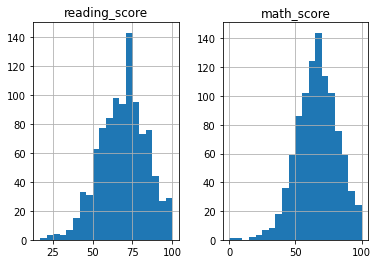

In [4]:
# Create Histogram
sp_df.hist(column=["reading_score", "math_score"], bins=20)

3. Create a boxplot from your data.

array([<AxesSubplot:title={'center':'reading_score'}, xlabel='gender'>,
       <AxesSubplot:title={'center':'math_score'}, xlabel='gender'>],
      dtype=object)

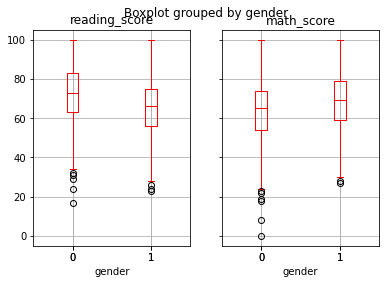

In [5]:
# Create Boxplot
sp_df.boxplot(column=["reading_score","math_score"], by = "gender", color='red')

4. Create a bivariate plot from your data.

C:\Users\Andrew\AppData\Local\Temp/ipykernel_4392/2172714982.py:9: UserWarning: Legend does not support 'F' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("Female","Male")
C:\Users\Andrew\AppData\Local\Temp/ipykernel_4392/2172714982.py:9: UserWarning: Legend does not support 'e' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("Female","Male")
C:\Users\Andrew\AppData\Local\Temp/ipykernel_4392/2172714982.py:9: UserWarning: Legend does not support 'm' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("Female","Male")
C:\Users\Andrew\AppData\Local\Temp/ipykernel_4392/2172714982.py:9: Use

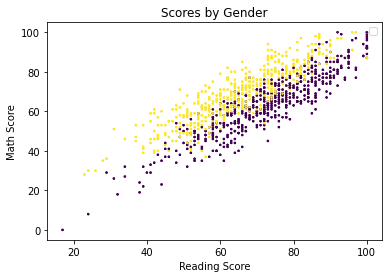

In [6]:
# Create Scatterplot
x = sp_df.reading_score
y = sp_df.math_score
for color, group in sp_df.groupby(["gender"]):
    plt.scatter(x,y,s=2,c=sp_df.gender,label=color)
plt.title("Scores by Gender")
plt.xlabel("Reading Score")
plt.ylabel("Math Score")
plt.legend("Female","Male")
plt.show()

# Professor, after several hours on this color/legend I have been unable to figure out where I am going wrong. I can either
# get both gender values in the legend, but they are both labeled with the same color in the legend, or I can only get 
# one variable to show up in the legend, but it is correctly colored and labeled. 
# Any insight into how I can better create this would be very helpful.

5. Create any additional visualizations that will help to answer the question(s) you want to answer.

In [7]:
# Create Correlation Matrix
sp_df.corr(method='pearson')

,gender,math_score,reading_score,writing_score
gender,1.000000,0.167982,-0.244313,-0.301225
math_score,0.167982,1.000000,0.817580,0.802642
reading_score,-0.244313,0.817580,1.000000,0.954598
writing_score,-0.301225,0.802642,0.954598,1.000000


As the above plots provide a strong visual interpretation, there are not any visualizations that I believe will better show potential correlation. Instead, I have chosen to examine a correlation matrix to further clarify information garnered from the plotting. 

6. Summarize your results and make a conclusion. Explain how you arrived at this conclusion and how your visualizations support your conclusion.

The above results indicate that there is not a statistically significant correlation between gender and reading or math scores. While both the scatter and box plots indicate there are minor relationships between females and reading scores (.24), as well as males and math scores (.16), neither is large enough to consider statistically significant. The -.24 correlation coefficient between gender and reading scores shows that as gender decreases reading scores increase, and as gender is represented with binary values of 0 equaling female and 1 equaling male, a "decreasing" gender value indicates female. The inverse is shown with math scores as the .16 coefficient shows as gender value "increases" the math score value does so as well, indicating that male students score higher than female in math. Again though, these values and plots only show a minor relationship between gender and reading or math score values. 